In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
plt.style.use('ggplot')

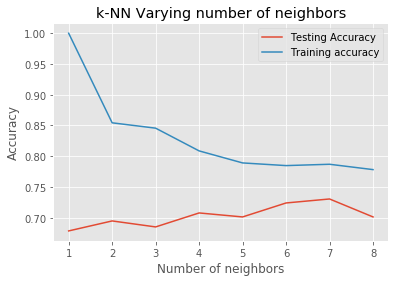

             precision    recall  f1-score   support

          0       0.78      0.82      0.80       201
          1       0.62      0.56      0.59       107

avg / total       0.73      0.73      0.73       308



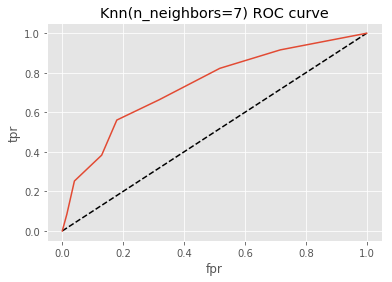

have diabetes or not?
[1 0 0 0 0 0 0 0 1]
[[5.00e+00 1.66e+02 7.20e+01 1.90e+01 1.75e+02 2.58e+01 5.87e-01 5.10e+01]
 [7.00e+00 1.00e+02 0.00e+00 0.00e+00 0.00e+00 3.00e+01 4.84e-01 3.20e+01]
 [0.00e+00 1.18e+02 8.40e+01 4.70e+01 2.30e+02 4.58e+01 5.51e-01 3.10e+01]
 [7.00e+00 1.07e+02 7.40e+01 0.00e+00 0.00e+00 2.96e+01 2.54e-01 3.10e+01]
 [1.00e+00 1.03e+02 3.00e+01 3.80e+01 8.30e+01 4.33e+01 1.83e-01 3.30e+01]
 [1.00e+00 1.15e+02 7.00e+01 3.00e+01 9.60e+01 3.46e+01 5.29e-01 3.20e+01]
 [3.00e+00 1.26e+02 8.80e+01 4.10e+01 2.35e+02 3.93e+01 7.04e-01 2.70e+01]
 [8.00e+00 9.90e+01 8.40e+01 0.00e+00 0.00e+00 3.54e+01 3.88e-01 5.00e+01]
 [7.00e+00 1.96e+02 9.00e+01 0.00e+00 0.00e+00 3.98e+01 4.51e-01 4.10e+01]]
[0.68831169 0.75324675 0.74025974 0.67532468 0.67532468 0.80519481
 0.72727273 0.81818182 0.76315789 0.75      ]


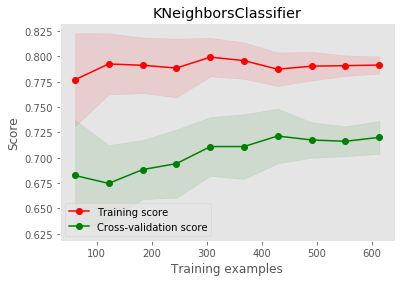

In [39]:
#diabetes

#Load the dataset
df = pd.read_csv("diabetes.csv")

#Print the first 5 rows of the dataframe.
df.head()
df.shape

#создадим пустые массивы для объектов и цели
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

#Setup для хранения точности обучения и тестирования
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Установить классификатор knn с k соседями
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Точность вычислений на тренировочном наборе
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
#Получить точность. Примечание: в случае алгоритмов классификации метод оценки представляет точность.
knn.score(X_test,y_test)
#давайте получим прогнозы, используя классификатор, который мы использовали выше
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(classification_report(y_test,y_pred))

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)
#В случае классификатора, такого как knn, параметр для настройки равен n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)
knn_cv.best_score_
knn_cv.best_params_

#.................

clf =KNeighborsClassifier(n_neighbors=7)
clf.fit(X, Y)
#print(clf.predict(X[:7]))

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X, Y)

print("have diabetes or not?")
n = 1
print(clf.predict(X[14:23]))
print((X[14:23]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("KNeighborsClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()



In [41]:
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import numpy as np
from IPython.display import Image
import sys
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

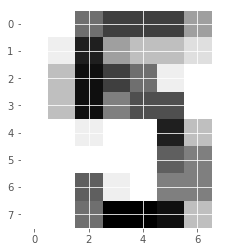

In [57]:
#numders

# load the data
digits = datasets.load_digits()
# look at the keys
print(digits.keys())
print(digits.DESCR)
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
# Create feature and target arrays
X = digits.data
Y = digits.target
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the classifier to the training data
knn.fit(X_train, y_train)
# Print the accuracy
print(knn.score(X_test, y_test))
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)


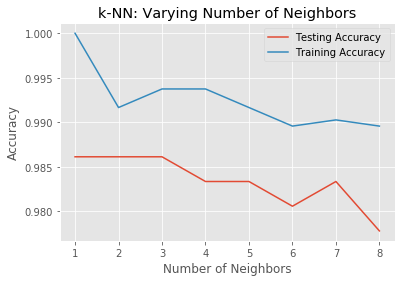

[1 2 3 4 9 6 7 8 9]
[[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
   9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
 [ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
   1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
   0. 16.  6.  0.  0.  4. 15. 16. 13.

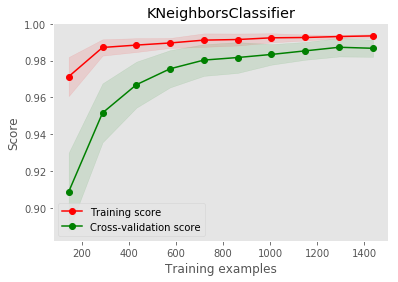

In [59]:
    # Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

clf =KNeighborsClassifier(n_neighbors=3)
clf.fit(X, Y)
#print(clf.predict(X[:7]))

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, Y)


n = 1
print(clf.predict(X[1:10]))
print((X[1:10]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("KNeighborsClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()
